TensorFlow Schoolwork

@author：刘士坤 2016011371

使用TensorFlow设计K近邻模型，并使用鸢尾花数据集训练、验证模型。


导入相应的库

In [9]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1.将鸢尾花数据集安装8 : 2的比例划分成训练集与验证集（不使用Dataset API）。

#### 数据集导入

In [2]:
data = pd.read_csv('./data/iris.data.csv', header=None)   # iris数据集
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'species']    # 特征及类别名称

#### 将原始数据集划分成训练集与测试集
##### 将三个类别的数据分别提取出来，setosa、versicolor、virginica分别用0、1、2来表示

In [3]:
X = data.iloc[0:150, 0:4].values
y = data.iloc[0:150, 4].values
y[y == 'Iris-setosa'] = 0                                 # Iris-setosa 输出label用0表示
y[y == 'Iris-versicolor'] = 1                             # Iris-versicolor 输出label用1表示
y[y == 'Iris-virginica'] = 2                              # Iris-virginica 输出label用2表示
X_setosa, y_setosa = X[0:50], y[0:50]                     # Iris-setosa 4个特征
X_versicolor, y_versicolor = X[50:100], y[50:100]         # Iris-versicolor 4个特征
X_virginica, y_virginica = X[100:150], y[100:150]         # Iris-virginica 4个特征

##### 将每个类别的所有样本分成训练样本（training set）和测试样本（test set），各占所有样本的比例分别为80%，20%。进行40：10的划分后合并

In [4]:
# training set
X_setosa_train = X_setosa[:40, :]
y_setosa_train = y_setosa[:40]
X_versicolor_train = X_versicolor[:40, :]
y_versicolor_train = y_versicolor[:40]
X_virginica_train = X_virginica[:40, :]
y_virginica_train = y_virginica[:40]
X_train = np.vstack([X_setosa_train, X_versicolor_train, X_virginica_train])
y_train = np.hstack([y_setosa_train, y_versicolor_train, y_virginica_train])

# test set
X_setosa_test = X_setosa[40:50, :]
y_setosa_test = y_setosa[40:50]
X_versicolor_test = X_versicolor[40:50, :]
y_versicolor_test = y_versicolor[40:50]
X_virginica_test = X_virginica[40:50, :]
y_virginica_test = y_virginica[40:50]
X_test = np.vstack([X_setosa_test, X_versicolor_test, X_virginica_test])
y_test = np.hstack([y_setosa_test, y_versicolor_test, y_virginica_test])

### 2.设计模型：
        使用TensorFlow设计K近邻模型（可不使用KD树优化算法）
        模型关键部分需添加注释

#### KNN的训练过程实际上是一种数据标类、数据存储的过程

##### 计算输入测试样本和所有训练样本之间的距离

In [5]:
#构建图模型
# 输入占位符，X_train为训练集的占位符，X_test为一个验证样本的占位符
z_train = tf.placeholder("float", [None, 4])
z_test = tf.placeholder("float", [4])
#构建计算距离
distance = tf.reduce_sum(tf.abs(tf.add(z_train, tf.negative(z_test))), reduction_indices=1)

# 预测函数   TensorFlow设计K近邻模型
def knn(K): 
    with tf.Session() as sess:
        #字典存储
        pred = [] 
        #测试集循环
        for i in range(len(X_test)):
            #距离矩阵
            distance_matrix = sess.run(distance, feed_dict={z_train:X_train,z_test:X_test[i]}) 
            #根据K值，选择最可能属于的类别
            # 矩阵排序,先取前K个
            knn_fir = np.argsort(distance_matrix)[:K]
            #再三个类别投票表决 
            Iris_class=[0, 0, 0]
            for m in knn_fir:
                if(y_train[m]==0):
                    Iris_class[0] += 1
                elif(y_train[m]==1):
                    Iris_class[1] += 1
                else:
                    Iris_class[2] += 1
            y_pred = np.argmax(Iris_class)
            pred.append(y_pred)
        return pred

### 3.训练模型：
        使用TensorFlow完成训练相关的代码
        训练关键部分需添加注释

#### KNN的测试过程是核心部分：选择合适的K值

In [6]:
k_scores = []
for K in range(1, 10):
    y_pred = knn(K)
    acc = np.sum(np.equal(y_pred,y_test)) / len(y_test)
    k_scores.append(acc)

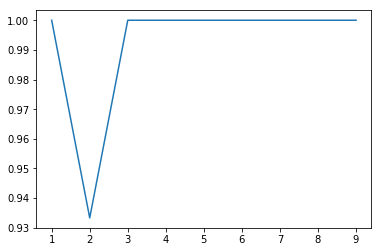

In [7]:
plt.plot(range(1, 10), k_scores)
plt.savefig("accuracy.png")#保存图像用于之后的作业提交

### 4.验证模型：
        使用验证集检测模型性能
        使用验证集调整超参数

#### 选择完合适的K值之后，就可以对验证集进行预测分析

In [8]:
y_pred = knn(5)
accuracy = np.mean(y_pred == y_test)
print('测试集预测准确率：%f' % accuracy)

测试集预测准确率：1.000000
